Using TensorFlow backend.


2020-10-01 21:06:57.434315
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [1.224, 1.393, 3.796, 2.96, 1.47]
nb_params: 9409
time per iteration: [0.619, 1.119, 1.673, 2.298, 2.125]
total time: 7.834
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user59_imp.pkl


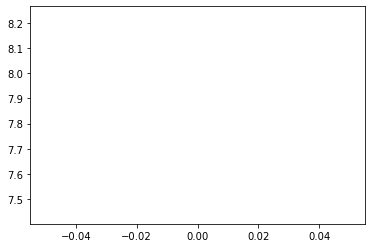

####
1/9216 fishished experiments
####
2020-10-01 21:15:06.659622
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [1.644, 1.011, 1.94, 1.297, 1.478]
nb_params: 9409
time per iteration: [0.453, 0.932, 1.367, 1.748, 2.056]
total time: 6.556
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user59_imp.pkl


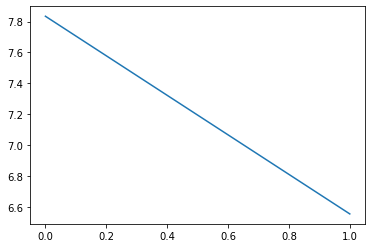

####
2/9216 fishished experiments
####
2020-10-01 21:21:54.461214
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [2.134, 0.996, 1.673, 1.494, 2.41]
nb_params: 9409
time per iteration: [0.467, 0.961, 1.405, 1.785, 2.196]
total time: 6.814
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user59_imp.pkl


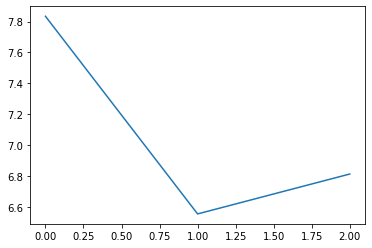

####
3/9216 fishished experiments
####
2020-10-01 21:28:57.783356
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [1.337, 1.634, 1.785, 0.966, 0.988]
nb_params: 4801
time per iteration: [0.419, 0.832, 1.238, 1.622, 1.929]
total time: 6.04
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user59_imp.pkl


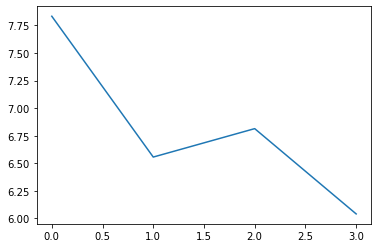

####
4/9216 fishished experiments
####
2020-10-01 21:35:07.755911
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [1.361, 1.197, 0.8, 1.642, 2.287]
nb_params: 4801
time per iteration: [0.443, 0.863, 1.296, 1.682, 2.024]
total time: 6.308000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user59_imp.pkl


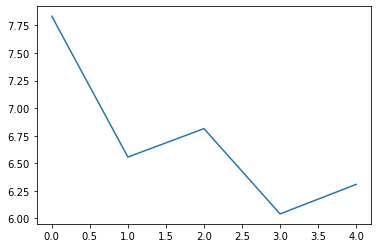

####
5/9216 fishished experiments
####
2020-10-01 21:41:34.225672
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.848, 1.236, 1.261, 1.461, 3.015]
nb_params: 4801
time per iteration: [0.455, 0.887, 1.293, 1.687, 2.043]
total time: 6.365
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user59_imp.pkl


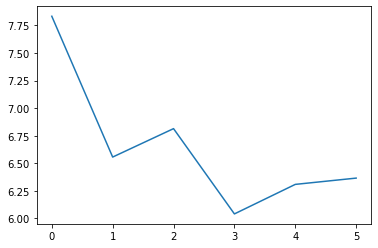

####
6/9216 fishished experiments
####
2020-10-01 21:48:04.050891
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.935, 0.869, 0.633, 0.751, 1.372]
nb_params: 2497
time per iteration: [0.426, 0.844, 1.238, 1.544, 2.702]
total time: 6.754
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user59_imp.pkl


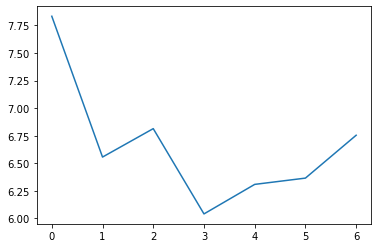

####
7/9216 fishished experiments
####
2020-10-01 21:54:53.827834
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.993, 1.193, 0.572, 1.491, 3.324]
nb_params: 2497
time per iteration: [0.577, 1.138, 2.275, 3.209, 3.406]
total time: 10.605
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user59_imp.pkl


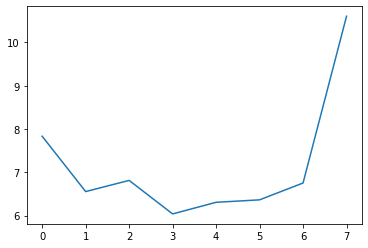

####
8/9216 fishished experiments
####
2020-10-01 22:05:39.096213
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.828, 1.388, 1.093, 1.207, 0.746]
nb_params: 2497
time per iteration: [0.659, 1.408, 3.036, 3.944, 4.888]
total time: 13.935
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user59_imp.pkl


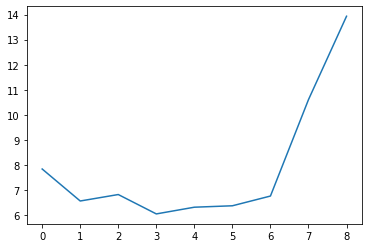

####
9/9216 fishished experiments
####
2020-10-01 22:19:46.020230
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.844, 0.729, 0.464, 0.68, 0.658]
nb_params: 1345
time per iteration: [1.088, 2.135, 3.235, 4.341, 4.97]
total time: 15.768999999999998
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user59_imp.pkl


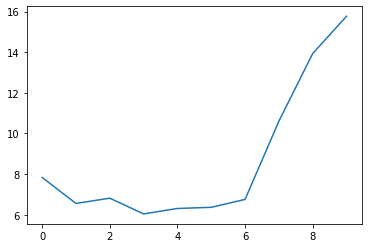

####
10/9216 fishished experiments
####
2020-10-01 22:35:40.053182
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.983, 0.727, 0.636, 0.581, 0.827]
nb_params: 1345
time per iteration: [0.616, 1.511, 2.391, 3.214, 3.294]
total time: 11.026
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user59_imp.pkl


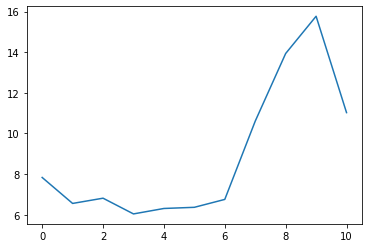

####
11/9216 fishished experiments
####
2020-10-01 22:46:49.070816
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.786, 0.731, 0.54, 1.622, 3.064]
nb_params: 1345
time per iteration: [0.693, 2.319, 4.698, 5.232, 6.476]
total time: 19.418
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user59_imp.pkl


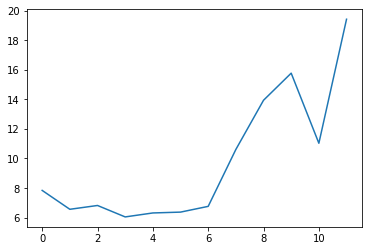

####
12/9216 fishished experiments
####
2020-10-01 23:06:23.148903
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.873, 0.935, 0.59, 0.88, 0.629]
nb_params: 9409
time per iteration: [0.872, 1.16, 1.164, 1.738, 1.858]
total time: 6.792
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user59_imp.pkl


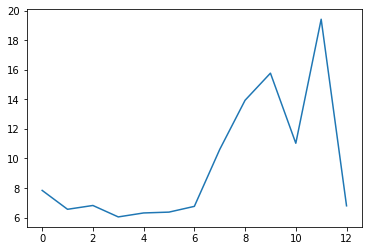

####
13/9216 fishished experiments
####
2020-10-01 23:13:33.093180
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [1.018, 0.725, 0.557, 0.52, 0.461]
nb_params: 9409
time per iteration: [0.433, 0.919, 1.735, 2.476, 2.968]
total time: 8.531
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user59_imp.pkl


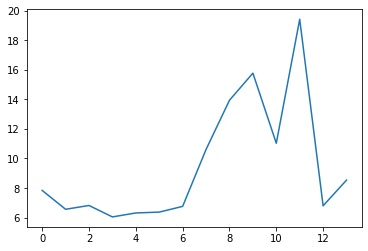

####
14/9216 fishished experiments
####
2020-10-01 23:22:24.904353
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.653, 0.777, 0.619, 0.65, 0.646]
nb_params: 9409
time per iteration: [0.658, 1.366, 1.814, 2.63, 2.033]
total time: 8.501
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user59_imp.pkl


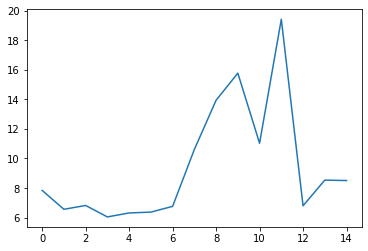

####
15/9216 fishished experiments
####
2020-10-01 23:31:20.835454
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.582, 0.714, 0.359, 0.608, 0.476]
nb_params: 4801
time per iteration: [0.316, 0.938, 1.251, 1.537, 1.628]
total time: 5.67
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user59_imp.pkl


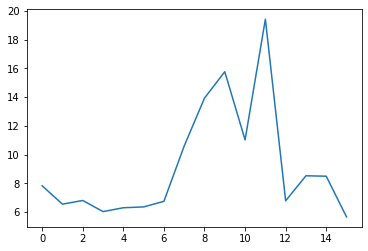

####
16/9216 fishished experiments
####
2020-10-01 23:37:11.615387
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.655, 0.703, 0.352, 0.561, 0.452]
nb_params: 4801
time per iteration: [0.502, 1.297, 3.161, 3.835, 4.996]
total time: 13.791
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user59_imp.pkl


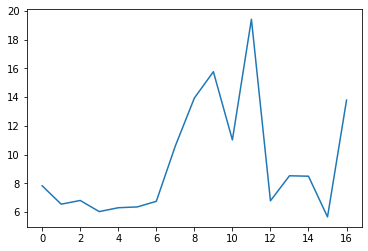

####
17/9216 fishished experiments
####
2020-10-01 23:51:23.601140
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.46, 0.549, 0.306, 0.604, 0.399]
nb_params: 4801
time per iteration: [1.092, 2.178, 2.84, 1.55, 2.124]
total time: 9.783999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user59_imp.pkl


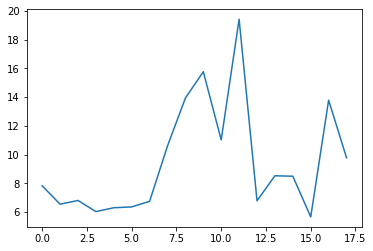

####
18/9216 fishished experiments
####
2020-10-02 00:01:30.836046
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.557, 0.655, 0.372, 0.684, 0.639]
nb_params: 2497
time per iteration: [0.641, 1.228, 1.605, 1.73, 2.128]
total time: 7.332000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user59_imp.pkl


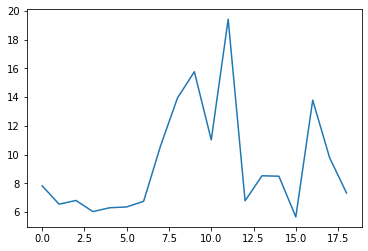

####
19/9216 fishished experiments
####
2020-10-02 00:08:59.522147
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.62, 0.985, 0.354, 0.689, 0.458]
nb_params: 2497
time per iteration: [0.337, 0.883, 1.75, 3.254, 3.876]
total time: 10.1
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user59_imp.pkl


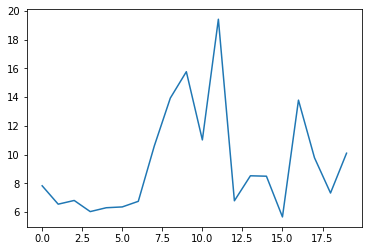

####
20/9216 fishished experiments
####
2020-10-02 00:19:17.484237
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.472, 0.545, 0.307, 0.445, 0.603]
nb_params: 2497
time per iteration: [0.952, 1.831, 2.697, 3.481, 4.81]
total time: 13.771
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user59_imp.pkl


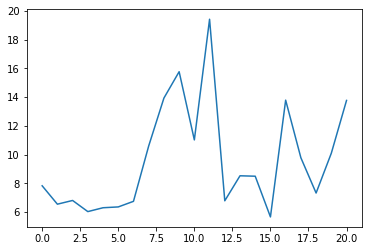

####
21/9216 fishished experiments
####
2020-10-02 00:33:19.123523
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.518, 0.811, 0.342, 0.604, 0.508]
nb_params: 1345
time per iteration: [1.121, 2.076, 2.164, 1.535, 1.493]
total time: 8.389000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user59_imp.pkl


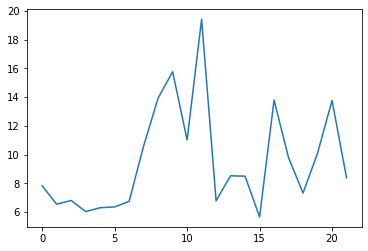

####
22/9216 fishished experiments
####
2020-10-02 00:41:49.222051
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.577, 0.629, 0.37, 0.514, 0.531]
nb_params: 1345
time per iteration: [0.341, 0.662, 0.951, 1.269, 1.496]
total time: 4.718999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user59_imp.pkl


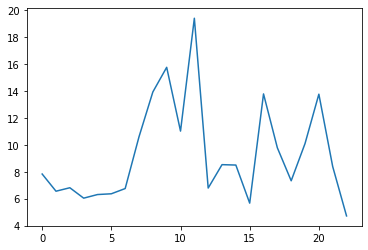

####
23/9216 fishished experiments
####
2020-10-02 00:46:35.186604
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user59_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.431, 0.64, 0.29, 0.436, 0.522]
nb_params: 1345
time per iteration: [0.344, 0.66, 0.935, 1.15, 1.377]
total time: 4.466
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user59_imp.pkl


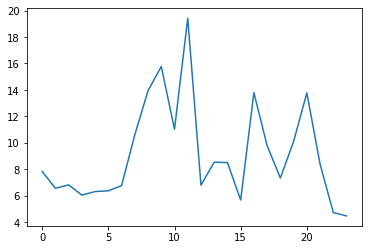

####
24/9216 fishished experiments
####
2020-10-02 00:51:05.813293
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.314, 0.267, 0.19, 0.421, 0.438]
nb_params: 9409
time per iteration: [0.614, 1.303, 1.836, 2.359, 2.867]
total time: 8.979
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user58_imp.pkl


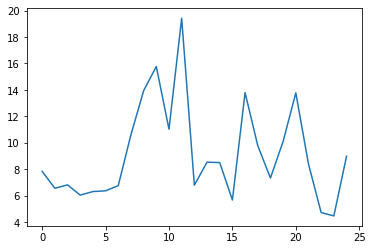

####
25/9216 fishished experiments
####
2020-10-02 01:00:23.733494
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.289, 0.247, 0.187, 0.423, 0.414]
nb_params: 9409
time per iteration: [0.649, 1.409, 2.114, 2.554, 3.131]
total time: 9.857
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user58_imp.pkl


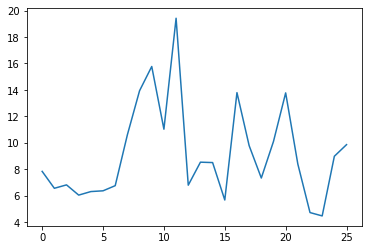

####
26/9216 fishished experiments
####
2020-10-02 01:10:35.317529
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.255, 0.199, 0.157, 0.375, 0.347]
nb_params: 9409
time per iteration: [0.704, 1.107, 2.383, 3.008, 2.734]
total time: 9.936
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user58_imp.pkl


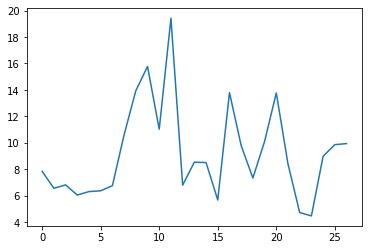

####
27/9216 fishished experiments
####
2020-10-02 01:20:51.895841
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.3, 0.24, 0.198, 0.419, 0.418]
nb_params: 4801
time per iteration: [0.52, 1.009, 1.517, 2.052, 2.338]
total time: 7.436
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user58_imp.pkl


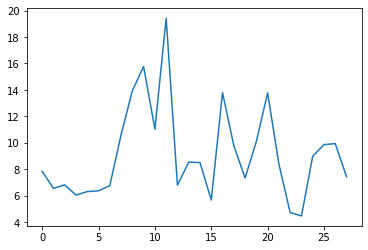

####
28/9216 fishished experiments
####
2020-10-02 01:28:27.475077
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.271, 0.243, 0.181, 0.411, 0.394]
nb_params: 4801
time per iteration: [0.525, 1.031, 1.537, 1.998, 2.386]
total time: 7.477
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user58_imp.pkl


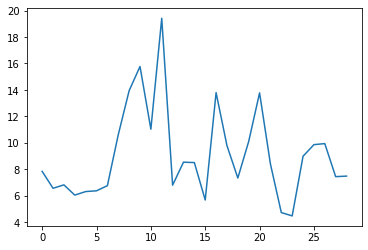

####
29/9216 fishished experiments
####
2020-10-02 01:36:05.162402
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.24, 0.2, 0.186, 0.367, 0.336]
nb_params: 4801
time per iteration: [0.517, 1.053, 1.561, 2.003, 2.453]
total time: 7.587
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user58_imp.pkl


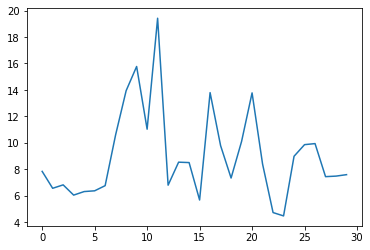

####
30/9216 fishished experiments
####
2020-10-02 01:43:49.784732
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.301, 0.246, 0.189, 0.423, 0.402]
nb_params: 2497
time per iteration: [0.492, 1.063, 1.268, 1.517, 1.83]
total time: 6.17
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user58_imp.pkl


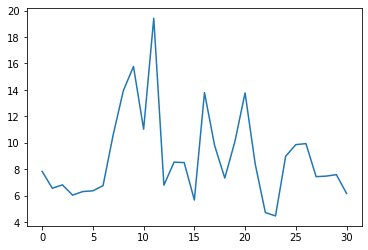

####
31/9216 fishished experiments
####
2020-10-02 01:50:05.474487
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.279, 0.235, 0.218, 0.41, 0.388]
nb_params: 2497
time per iteration: [0.401, 0.806, 1.195, 1.546, 1.856]
total time: 5.804
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user58_imp.pkl


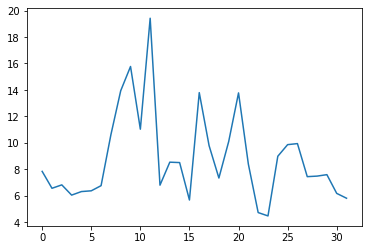

####
32/9216 fishished experiments
####
2020-10-02 01:55:58.057070
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.248, 0.201, 0.19, 0.376, 0.331]
nb_params: 2497
time per iteration: [0.413, 0.804, 1.203, 1.568, 1.873]
total time: 5.861
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user58_imp.pkl


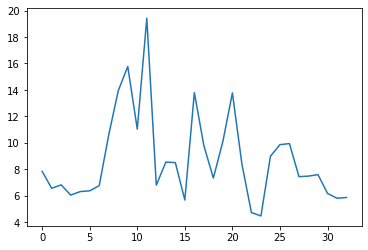

####
33/9216 fishished experiments
####
2020-10-02 02:01:54.001291
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.305, 0.237, 0.229, 0.413, 0.405]
nb_params: 1345
time per iteration: [0.389, 0.786, 1.155, 1.532, 1.823]
total time: 5.6850000000000005
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user58_imp.pkl


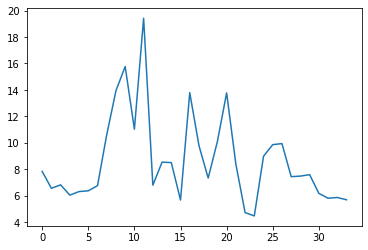

####
34/9216 fishished experiments
####
2020-10-02 02:07:38.002845
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.3, 0.235, 0.221, 0.414, 0.386]
nb_params: 1345
time per iteration: [0.394, 0.799, 1.05, 1.476, 1.839]
total time: 5.558
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user58_imp.pkl


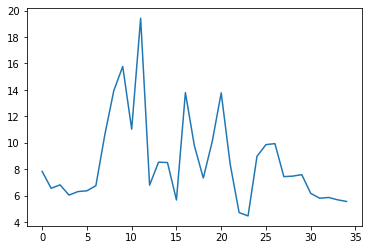

####
35/9216 fishished experiments
####
2020-10-02 02:13:14.233591
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.293, 0.199, 0.194, 0.384, 0.329]
nb_params: 1345
time per iteration: [0.395, 0.784, 1.192, 1.524, 1.853]
total time: 5.748
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user58_imp.pkl


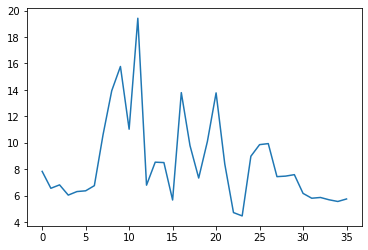

####
36/9216 fishished experiments
####
2020-10-02 02:19:01.793801
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.17, 0.182, 0.12, 0.319, 0.293]
nb_params: 9409
time per iteration: [0.219, 0.418, 0.601, 0.752, 0.927]
total time: 2.917
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user58_imp.pkl


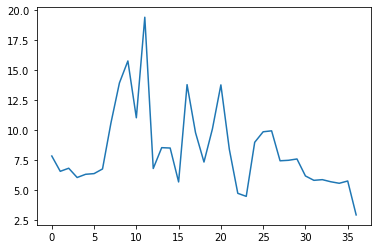

####
37/9216 fishished experiments
####
2020-10-02 02:22:03.089938
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.176, 0.195, 0.116, 0.298, 0.311]
nb_params: 9409
time per iteration: [0.232, 0.446, 0.652, 0.843, 0.996]
total time: 3.169
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user58_imp.pkl


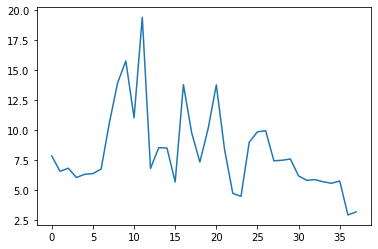

####
38/9216 fishished experiments
####
2020-10-02 02:25:20.269697
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.141, 0.165, 0.125, 0.304, 0.268]
nb_params: 9409
time per iteration: [0.238, 0.469, 0.683, 0.871, 1.074]
total time: 3.335
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user58_imp.pkl


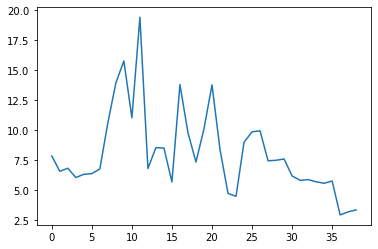

####
39/9216 fishished experiments
####
2020-10-02 02:28:47.707690
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.152, 0.194, 0.131, 0.302, 0.311]
nb_params: 4801
time per iteration: [0.207, 0.401, 0.597, 0.682, 0.918]
total time: 2.805
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user58_imp.pkl


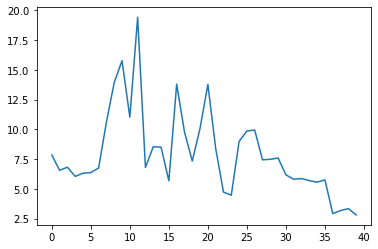

####
40/9216 fishished experiments
####
2020-10-02 02:31:40.016521
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.156, 0.173, 0.139, 0.304, 0.298]
nb_params: 4801
time per iteration: [0.216, 0.414, 0.635, 0.788, 0.949]
total time: 3.002
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user58_imp.pkl


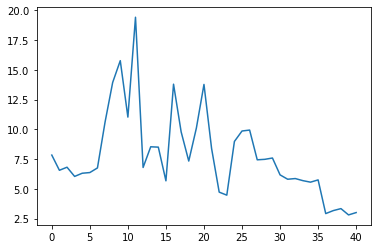

####
41/9216 fishished experiments
####
2020-10-02 02:34:44.178467
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.128, 0.169, 0.117, 0.293, 0.256]
nb_params: 4801
time per iteration: [0.225, 0.426, 0.624, 0.815, 0.97]
total time: 3.0599999999999996
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user58_imp.pkl


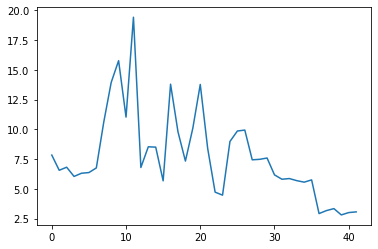

####
42/9216 fishished experiments
####
2020-10-02 02:37:52.003156
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.147, 0.171, 0.139, 0.308, 0.301]
nb_params: 2497
time per iteration: [0.209, 0.409, 0.588, 0.697, 0.876]
total time: 2.779
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user58_imp.pkl


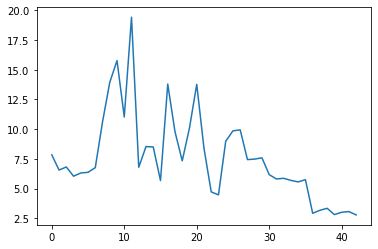

####
43/9216 fishished experiments
####
2020-10-02 02:40:41.234196
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.161, 0.172, 0.134, 0.304, 0.287]
nb_params: 2497
time per iteration: [0.209, 0.411, 0.606, 0.773, 0.939]
total time: 2.938
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user58_imp.pkl


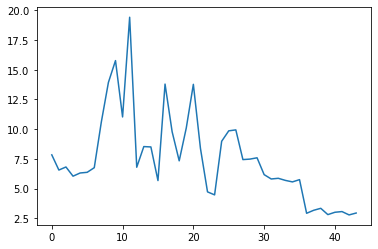

####
44/9216 fishished experiments
####
2020-10-02 02:43:40.031287
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.14, 0.154, 0.148, 0.288, 0.244]
nb_params: 2497
time per iteration: [0.214, 0.41, 0.61, 0.773, 0.944]
total time: 2.951
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user58_imp.pkl


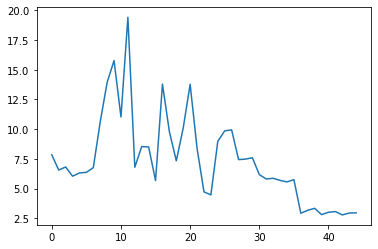

####
45/9216 fishished experiments
####
2020-10-02 02:46:39.911247
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.155, 0.171, 0.133, 0.309, 0.284]
nb_params: 1345
time per iteration: [0.208, 0.396, 0.594, 0.762, 0.905]
total time: 2.865
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user58_imp.pkl


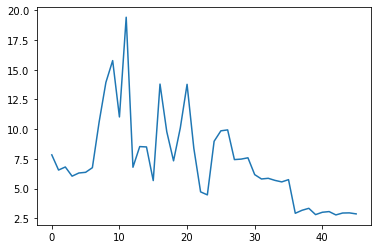

####
46/9216 fishished experiments
####
2020-10-02 02:49:33.563377
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.151, 0.158, 0.167, 0.299, 0.281]
nb_params: 1345
time per iteration: [0.212, 0.434, 0.711, 0.801, 0.929]
total time: 3.0869999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user58_imp.pkl


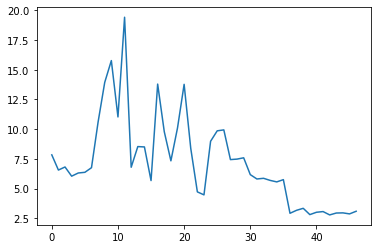

####
47/9216 fishished experiments
####
2020-10-02 02:52:40.643193
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user58_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.159, 0.158, 0.15, 0.297, 0.242]
nb_params: 1345
time per iteration: [0.21, 0.412, 0.6, 0.767, 0.931]
total time: 2.92
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user58_imp.pkl


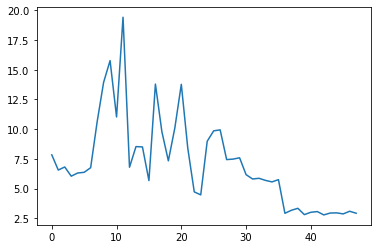

####
48/9216 fishished experiments
####
2020-10-02 02:55:37.812079
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.689, 0.423, 0.781, 0.897, 0.657]
nb_params: 9409
time per iteration: [0.434, 0.894, 1.319, 1.676, 2.041]
total time: 6.364000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user57_imp.pkl


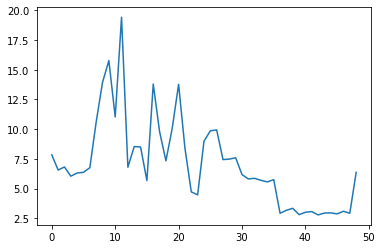

####
49/9216 fishished experiments
####
2020-10-02 03:02:13.080537
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.641, 0.45, 0.634, 0.825, 0.653]
nb_params: 9409
time per iteration: [0.468, 0.926, 1.391, 1.754, 2.117]
total time: 6.656
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user57_imp.pkl


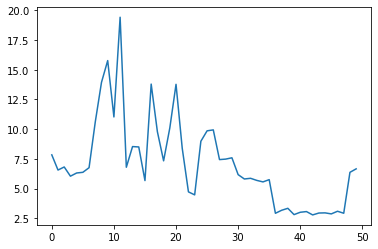

####
50/9216 fishished experiments
####
2020-10-02 03:09:06.317399
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.558, 0.404, 0.569, 0.759, 0.562]
nb_params: 9409
time per iteration: [0.485, 0.914, 1.431, 1.863, 2.195]
total time: 6.888
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user57_imp.pkl


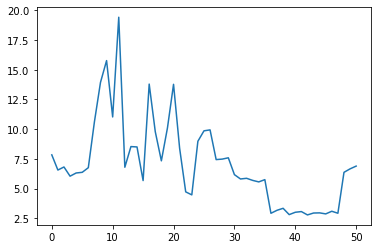

####
51/9216 fishished experiments
####
2020-10-02 03:16:13.900852
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.649, 0.484, 0.726, 0.849, 0.67]
nb_params: 4801
time per iteration: [0.419, 0.84, 1.247, 1.605, 1.904]
total time: 6.015000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user57_imp.pkl


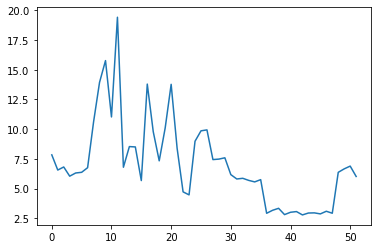

####
52/9216 fishished experiments
####
2020-10-02 03:22:22.184407
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.61, 0.419, 0.641, 0.838, 0.66]
nb_params: 4801
time per iteration: [0.43, 0.869, 1.266, 1.639, 2.003]
total time: 6.207
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user57_imp.pkl


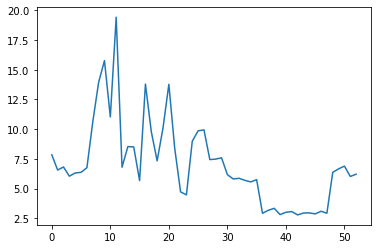

####
53/9216 fishished experiments
####
2020-10-02 03:28:42.025995
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.524, 0.412, 0.554, 0.711, 0.552]
nb_params: 4801
time per iteration: [0.434, 0.857, 1.313, 1.659, 1.995]
total time: 6.258
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user57_imp.pkl


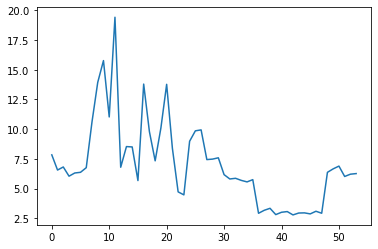

####
54/9216 fishished experiments
####
2020-10-02 03:35:05.298257
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.648, 0.471, 0.733, 0.892, 0.679]
nb_params: 2497
time per iteration: [0.407, 0.812, 1.233, 1.56, 1.873]
total time: 5.885000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user57_imp.pkl


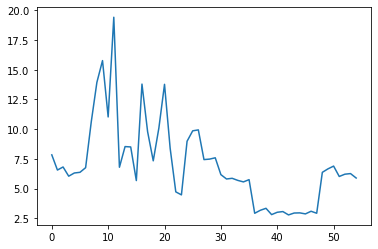

####
55/9216 fishished experiments
####
2020-10-02 03:41:02.626753
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.582, 0.449, 0.628, 0.844, 0.65]
nb_params: 2497
time per iteration: [0.42, 0.832, 1.241, 1.595, 1.934]
total time: 6.022
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user57_imp.pkl


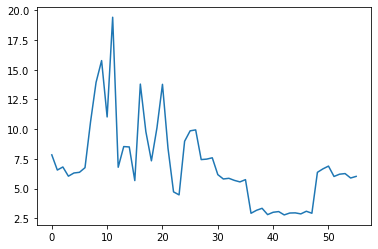

####
56/9216 fishished experiments
####
2020-10-02 03:47:08.192796
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.524, 0.393, 0.559, 0.717, 0.544]
nb_params: 2497
time per iteration: [0.415, 0.836, 1.222, 1.599, 1.925]
total time: 5.997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user57_imp.pkl


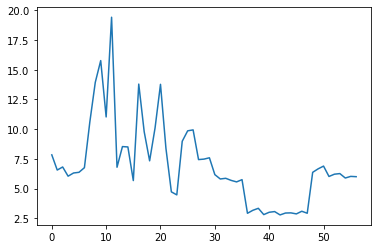

####
57/9216 fishished experiments
####
2020-10-02 03:53:12.551833
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.613, 0.468, 0.721, 0.893, 0.682]
nb_params: 1345
time per iteration: [0.41, 0.818, 1.213, 1.553, 1.878]
total time: 5.872
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user57_imp.pkl


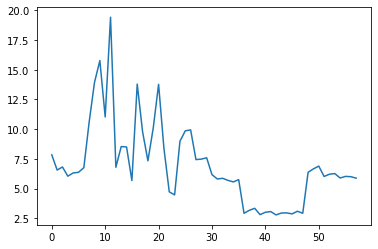

####
58/9216 fishished experiments
####
2020-10-02 03:59:07.494412
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.582, 0.425, 0.638, 0.844, 0.666]
nb_params: 1345
time per iteration: [0.417, 0.819, 1.222, 1.572, 1.873]
total time: 5.9030000000000005
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user57_imp.pkl


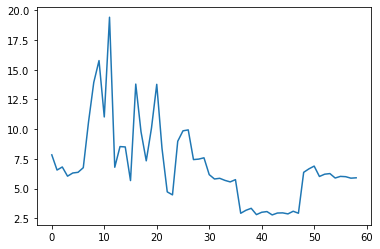

####
59/9216 fishished experiments
####
2020-10-02 04:05:04.381380
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.527, 0.403, 0.635, 0.744, 0.57]
nb_params: 1345
time per iteration: [0.414, 0.813, 1.232, 1.585, 1.905]
total time: 5.949
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user57_imp.pkl


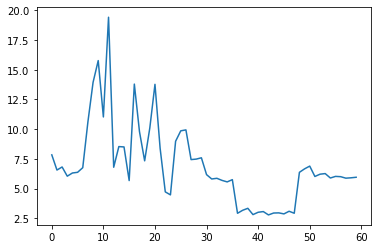

####
60/9216 fishished experiments
####
2020-10-02 04:11:03.992106
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.435, 0.268, 0.6, 0.706, 0.456]
nb_params: 9409
time per iteration: [0.224, 0.436, 0.63, 0.823, 0.962]
total time: 3.075
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user57_imp.pkl


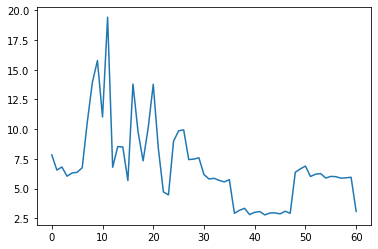

####
61/9216 fishished experiments
####
2020-10-02 04:14:14.949107
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.503, 0.288, 0.588, 0.757, 0.446]
nb_params: 9409
time per iteration: [0.233, 0.472, 0.678, 0.868, 1.054]
total time: 3.3049999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user57_imp.pkl


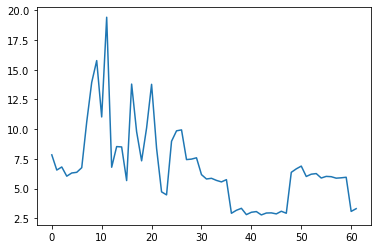

####
62/9216 fishished experiments
####
2020-10-02 04:17:40.169306
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.429, 0.315, 0.48, 0.64, 0.404]
nb_params: 9409
time per iteration: [0.244, 0.485, 0.723, 0.903, 1.101]
total time: 3.456
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user57_imp.pkl


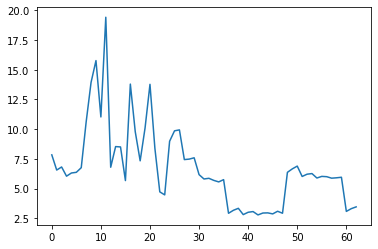

####
63/9216 fishished experiments
####
2020-10-02 04:21:15.061972
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.441, 0.272, 0.601, 0.83, 0.45]
nb_params: 4801
time per iteration: [0.213, 0.415, 0.631, 0.786, 0.936]
total time: 2.981
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user57_imp.pkl


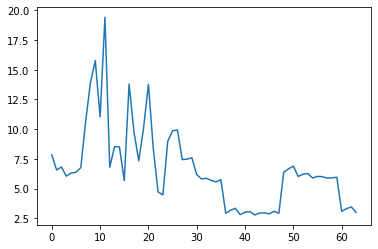

####
64/9216 fishished experiments
####
2020-10-02 04:24:17.989264
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.453, 0.331, 0.562, 0.687, 0.44]
nb_params: 4801
time per iteration: [0.228, 0.436, 0.637, 0.833, 0.981]
total time: 3.115
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user57_imp.pkl


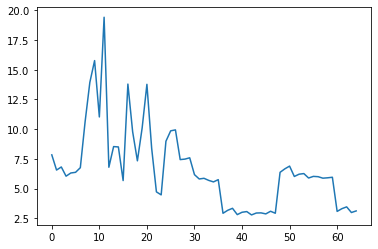

####
65/9216 fishished experiments
####
2020-10-02 04:27:28.932304
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.371, 0.302, 0.485, 0.639, 0.409]
nb_params: 4801
time per iteration: [0.237, 0.444, 0.653, 0.843, 1.001]
total time: 3.178
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user57_imp.pkl


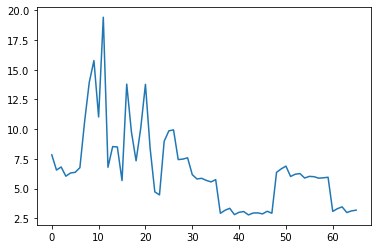

####
66/9216 fishished experiments
####
2020-10-02 04:30:43.762059
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.406, 0.331, 0.565, 0.777, 0.468]
nb_params: 2497
time per iteration: [0.213, 0.423, 0.621, 0.797, 0.952]
total time: 3.0060000000000002
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user57_imp.pkl


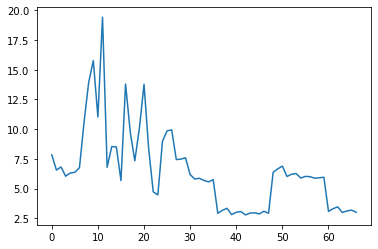

####
67/9216 fishished experiments
####
2020-10-02 04:33:46.573358
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.443, 0.33, 0.555, 0.7, 0.459]
nb_params: 2497
time per iteration: [0.219, 0.426, 0.619, 0.823, 0.957]
total time: 3.0439999999999996
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user57_imp.pkl


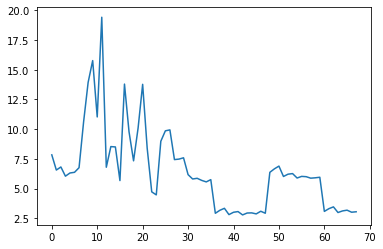

####
68/9216 fishished experiments
####
2020-10-02 04:36:52.038843
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.364, 0.287, 0.49, 0.645, 0.414]
nb_params: 2497
time per iteration: [0.224, 0.437, 0.653, 0.786, 0.952]
total time: 3.052
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user57_imp.pkl


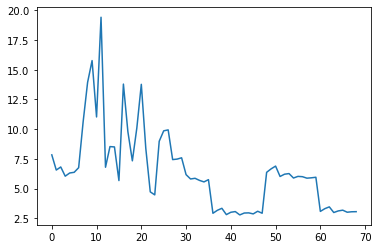

####
69/9216 fishished experiments
####
2020-10-02 04:39:57.800020
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.397, 0.321, 0.567, 0.806, 0.473]
nb_params: 1345
time per iteration: [0.213, 0.414, 0.597, 0.756, 0.934]
total time: 2.914
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user57_imp.pkl


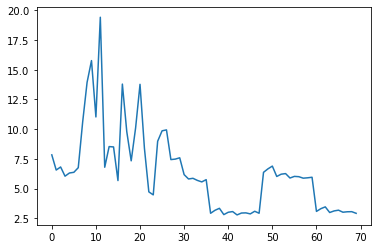

####
70/9216 fishished experiments
####
2020-10-02 04:42:54.348222
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.419, 0.32, 0.556, 0.697, 0.469]
nb_params: 1345
time per iteration: [0.208, 0.413, 0.604, 0.76, 0.974]
total time: 2.959
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user57_imp.pkl


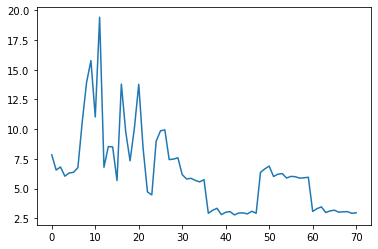

####
71/9216 fishished experiments
####
2020-10-02 04:45:53.682352
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user57_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.365, 0.283, 0.489, 0.63, 0.422]
nb_params: 1345
time per iteration: [0.226, 0.473, 0.617, 0.831, 0.985]
total time: 3.1319999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user57_imp.pkl


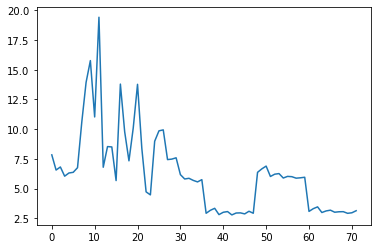

####
72/9216 fishished experiments
####
2020-10-02 04:49:03.567375
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.218, 0.391, 0.199, 0.277, 0.304]
nb_params: 9409
time per iteration: [0.44, 0.868, 1.316, 1.708, 2.013]
total time: 6.345
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user56_imp.pkl


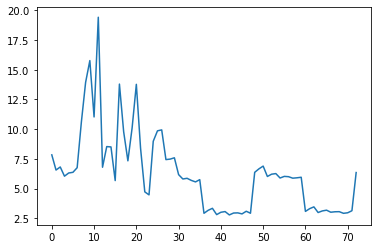

####
73/9216 fishished experiments
####
2020-10-02 04:55:37.578284
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.179, 0.35, 0.178, 0.342, 0.264]
nb_params: 9409
time per iteration: [0.476, 0.948, 1.363, 1.81, 2.129]
total time: 6.725999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user56_imp.pkl


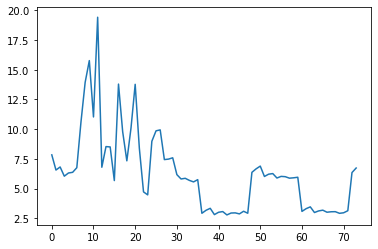

####
74/9216 fishished experiments
####
2020-10-02 05:02:35.139163
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.138, 0.278, 0.162, 0.378, 0.246]
nb_params: 9409
time per iteration: [0.487, 0.968, 1.423, 1.86, 2.207]
total time: 6.945
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user56_imp.pkl


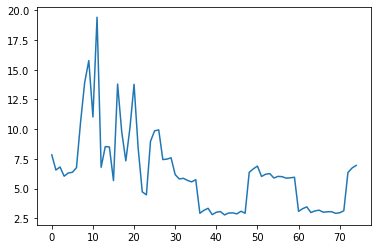

####
75/9216 fishished experiments
####
2020-10-02 05:09:45.584102
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.185, 0.378, 0.174, 0.332, 0.282]
nb_params: 4801
time per iteration: [0.418, 0.84, 1.262, 1.611, 1.957]
total time: 6.088
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user56_imp.pkl


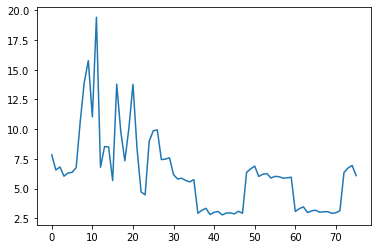

####
76/9216 fishished experiments
####
2020-10-02 05:15:58.240760
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.172, 0.342, 0.173, 0.427, 0.258]
nb_params: 4801
time per iteration: [0.436, 0.864, 1.326, 1.646, 1.997]
total time: 6.269
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user56_imp.pkl


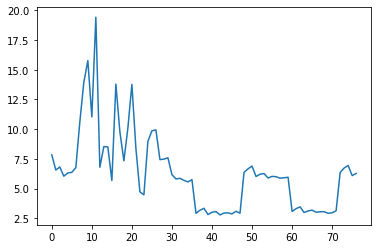

####
77/9216 fishished experiments
####
2020-10-02 05:22:22.284344
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.132, 0.259, 0.155, 0.4, 0.234]
nb_params: 4801
time per iteration: [0.443, 0.87, 1.299, 1.673, 2.01]
total time: 6.295
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user56_imp.pkl


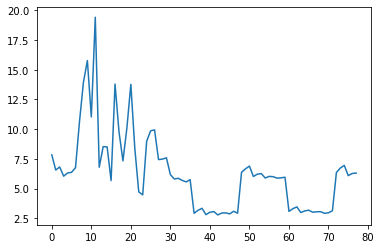

####
78/9216 fishished experiments
####
2020-10-02 05:28:47.767830
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.183, 0.37, 0.168, 0.398, 0.273]
nb_params: 2497
time per iteration: [0.421, 0.829, 1.211, 1.601, 1.915]
total time: 5.977
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user56_imp.pkl


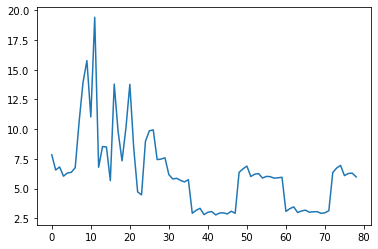

####
79/9216 fishished experiments
####
2020-10-02 05:34:50.614784
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.155, 0.335, 0.172, 0.46, 0.254]
nb_params: 2497
time per iteration: [0.416, 0.826, 1.25, 1.605, 1.966]
total time: 6.063
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user56_imp.pkl


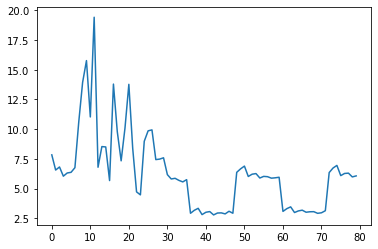

####
80/9216 fishished experiments
####
2020-10-02 05:40:59.058555
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.127, 0.25, 0.161, 0.414, 0.233]
nb_params: 2497
time per iteration: [0.399, 0.845, 1.249, 1.591, 1.975]
total time: 6.059000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user56_imp.pkl


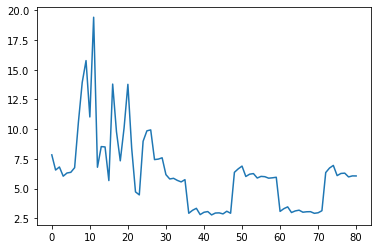

####
81/9216 fishished experiments
####
2020-10-02 05:47:07.127738
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.188, 0.368, 0.168, 0.449, 0.266]
nb_params: 1345
time per iteration: [0.417, 0.796, 1.245, 1.582, 1.896]
total time: 5.936
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user56_imp.pkl


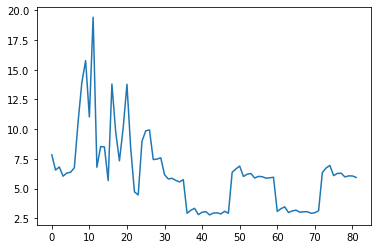

####
82/9216 fishished experiments
####
2020-10-02 05:53:05.989489
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.158, 0.337, 0.169, 0.489, 0.246]
nb_params: 1345
time per iteration: [0.422, 0.832, 1.232, 1.597, 1.879]
total time: 5.962
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user56_imp.pkl


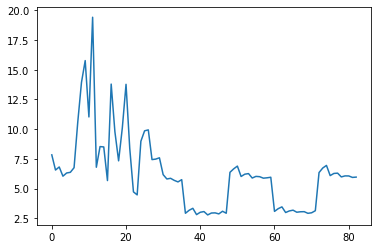

####
83/9216 fishished experiments
####
2020-10-02 05:59:06.262943
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.135, 0.268, 0.156, 0.395, 0.231]
nb_params: 1345
time per iteration: [0.42, 0.822, 1.207, 1.61, 1.896]
total time: 5.955
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user56_imp.pkl


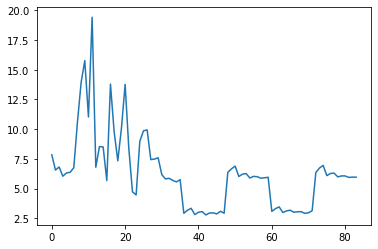

####
84/9216 fishished experiments
####
2020-10-02 06:05:06.252950
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.136, 0.279, 0.12, 0.14, 0.186]
nb_params: 9409
time per iteration: [0.222, 0.445, 0.644, 0.815, 0.973]
total time: 3.0989999999999998
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user56_imp.pkl


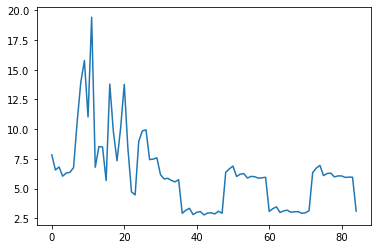

####
85/9216 fishished experiments
####
2020-10-02 06:08:18.712734
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.117, 0.292, 0.116, 0.133, 0.179]
nb_params: 9409
time per iteration: [0.245, 0.461, 0.669, 0.874, 1.049]
total time: 3.298
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user56_imp.pkl


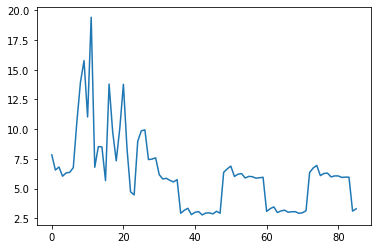

####
86/9216 fishished experiments
####
2020-10-02 06:11:43.737639
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.103, 0.228, 0.112, 0.137, 0.162]
nb_params: 9409
time per iteration: [0.25, 0.481, 0.725, 0.923, 1.052]
total time: 3.431
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user56_imp.pkl


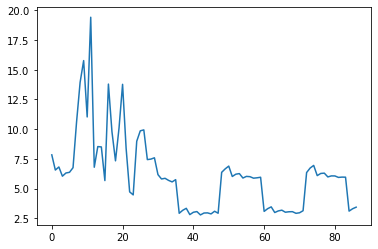

####
87/9216 fishished experiments
####
2020-10-02 06:15:16.978890
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.117, 0.284, 0.117, 0.132, 0.184]
nb_params: 4801
time per iteration: [0.216, 0.405, 0.62, 0.805, 0.935]
total time: 2.9810000000000003
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user56_imp.pkl


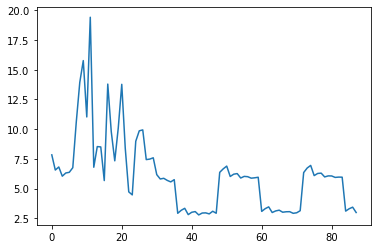

####
88/9216 fishished experiments
####
2020-10-02 06:18:19.933658
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.119, 0.273, 0.111, 0.141, 0.171]
nb_params: 4801
time per iteration: [0.246, 0.442, 0.641, 0.842, 0.989]
total time: 3.1599999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user56_imp.pkl


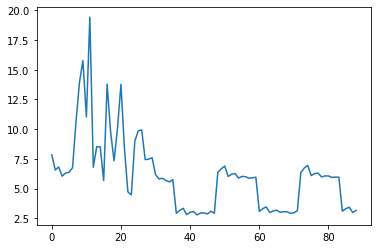

####
89/9216 fishished experiments
####
2020-10-02 06:21:33.869323
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.097, 0.219, 0.107, 0.227, 0.159]
nb_params: 4801
time per iteration: [0.229, 0.457, 0.675, 0.84, 1.038]
total time: 3.239
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user56_imp.pkl


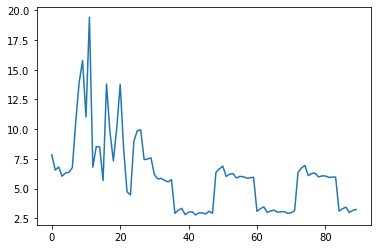

####
90/9216 fishished experiments
####
2020-10-02 06:24:52.493968
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.116, 0.273, 0.108, 0.139, 0.165]
nb_params: 2497
time per iteration: [0.217, 0.421, 0.605, 0.798, 0.953]
total time: 2.9939999999999998
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user56_imp.pkl


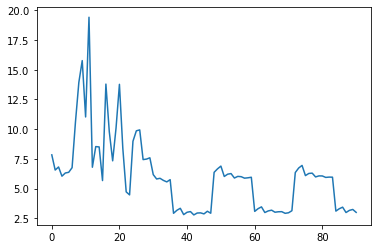

####
91/9216 fishished experiments
####
2020-10-02 06:27:54.899756
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.112, 0.268, 0.102, 0.216, 0.176]
nb_params: 2497
time per iteration: [0.22, 0.431, 0.636, 0.81, 0.97]
total time: 3.067
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user56_imp.pkl


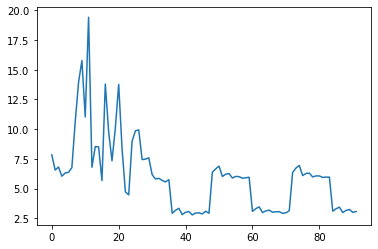

####
92/9216 fishished experiments
####
2020-10-02 06:31:01.443343
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.101, 0.211, 0.107, 0.281, 0.156]
nb_params: 2497
time per iteration: [0.227, 0.415, 0.636, 0.806, 0.982]
total time: 3.066
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user56_imp.pkl


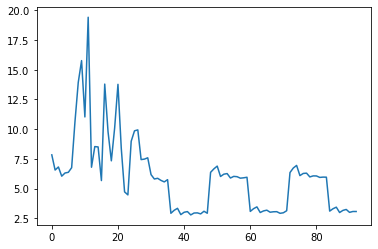

####
93/9216 fishished experiments
####
2020-10-02 06:34:07.925599
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.12, 0.271, 0.105, 0.227, 0.165]
nb_params: 1345
time per iteration: [0.217, 0.424, 0.595, 0.801, 0.961]
total time: 2.9979999999999998
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user56_imp.pkl


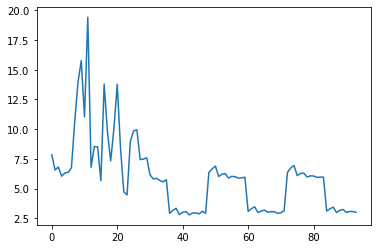

####
94/9216 fishished experiments
####
2020-10-02 06:37:09.752484
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.111, 0.261, 0.103, 0.263, 0.163]
nb_params: 1345
time per iteration: [0.217, 0.429, 0.607, 0.818, 0.973]
total time: 3.044
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user56_imp.pkl


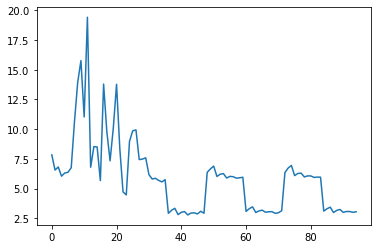

####
95/9216 fishished experiments
####
2020-10-02 06:40:14.185004
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user56_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.097, 0.213, 0.103, 0.288, 0.147]
nb_params: 1345
time per iteration: [0.219, 0.428, 0.651, 0.811, 0.954]
total time: 3.0629999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user56_imp.pkl


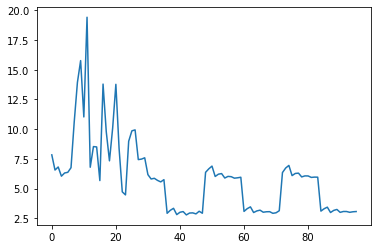

####
96/9216 fishished experiments
####
2020-10-02 06:43:19.765198
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.334, 0.243, 0.259, nan, 0.317]
nb_params: 9281
time per iteration: [0.399, 0.787, 1.158, 0, 1.785]
total time: 4.129
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user54_imp.pkl


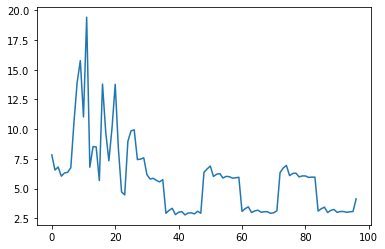

####
97/9216 fishished experiments
####
2020-10-02 06:47:39.506028
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.26, 0.231, 0.224, 0.236, 0.244]
nb_params: 9281
time per iteration: [0.394, 0.831, 1.195, 1.408, 1.907]
total time: 5.734999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user54_imp.pkl


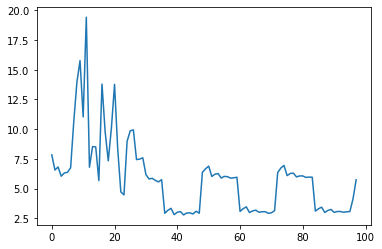

####
98/9216 fishished experiments
####
2020-10-02 06:53:37.329217
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.299, 0.228, 0.229, 0.429, 0.204]
nb_params: 9281
time per iteration: [0.425, 0.819, 1.2, 1.54, 1.928]
total time: 5.912
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user54_imp.pkl


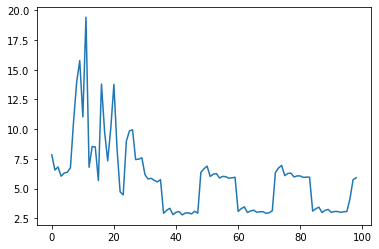

####
99/9216 fishished experiments
####
2020-10-02 06:59:46.342625
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.304, 0.228, 0.235, 0.061, 0.258]
nb_params: 4673
time per iteration: [0.373, 0.728, 1.065, 1.396, 1.625]
total time: 5.186999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user54_imp.pkl


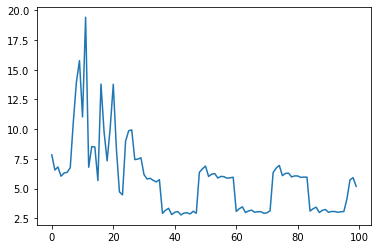

####
100/9216 fishished experiments
####
2020-10-02 07:05:05.062456
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.315, 0.226, 0.264, 0.58, 0.203]
nb_params: 4673
time per iteration: [0.363, 0.721, 1.104, 1.448, 1.693]
total time: 5.329000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user54_imp.pkl


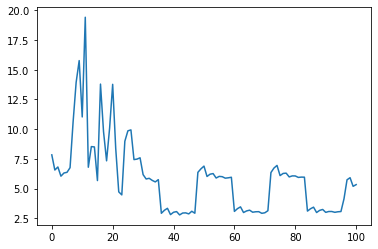

####
101/9216 fishished experiments
####
2020-10-02 07:10:32.147070
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.325, 0.232, 0.295, 0.32, 0.19]
nb_params: 4673
time per iteration: [0.39, 0.752, 1.118, 1.438, 1.702]
total time: 5.3999999999999995
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user54_imp.pkl


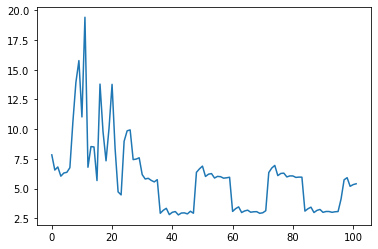

####
102/9216 fishished experiments
####
2020-10-02 07:16:04.130999
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.344, 0.226, 0.266, 0.544, 0.213]
nb_params: 2369
time per iteration: [0.361, 0.711, 1.048, 1.367, 1.596]
total time: 5.083
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user54_imp.pkl


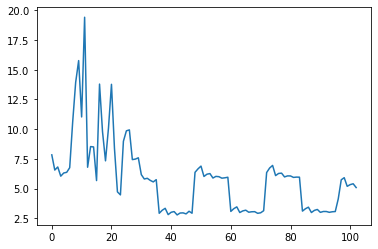

####
103/9216 fishished experiments
####
2020-10-02 07:21:13.506168
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.347, 0.227, 0.331, 0.409, 0.178]
nb_params: 2369
time per iteration: [0.366, 0.721, 1.039, 1.368, 1.647]
total time: 5.141
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user54_imp.pkl


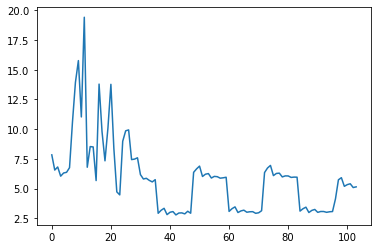

####
104/9216 fishished experiments
####
2020-10-02 07:26:26.440612
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.426, 0.23, 0.294, 0.278, 0.182]
nb_params: 2369
time per iteration: [0.346, 0.721, 1.085, 1.383, 1.65]
total time: 5.1850000000000005
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user54_imp.pkl


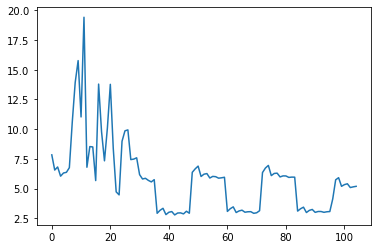

####
105/9216 fishished experiments
####
2020-10-02 07:31:41.917503
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.385, 0.227, 0.326, 0.416, 0.186]
nb_params: 1217
time per iteration: [0.359, 0.702, 1.046, 1.353, 1.589]
total time: 5.0489999999999995
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user54_imp.pkl


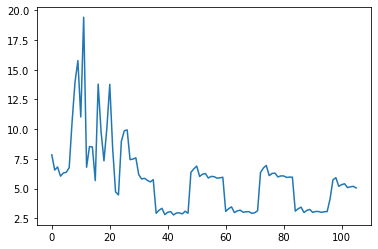

####
106/9216 fishished experiments
####
2020-10-02 07:36:47.535893
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.488, 0.222, 0.33, 0.362, 0.178]
nb_params: 1217
time per iteration: [0.337, 0.716, 0.957, 1.312, 1.634]
total time: 4.9559999999999995
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user54_imp.pkl


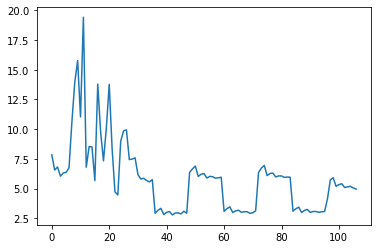

####
107/9216 fishished experiments
####
2020-10-02 07:41:47.509623
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.443, 0.219, 0.299, 0.255, 0.183]
nb_params: 1217
time per iteration: [0.337, 0.711, 1.042, 1.367, 1.626]
total time: 5.083
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user54_imp.pkl


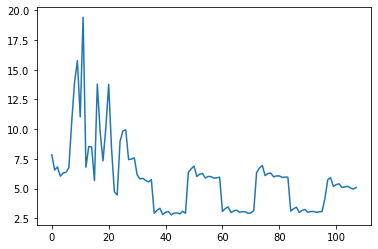

####
108/9216 fishished experiments
####
2020-10-02 07:46:55.132017
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.334, 0.117, 0.23, nan, 0.105]
nb_params: 9281
time per iteration: [0.195, 0.383, 0.558, 0, 0.846]
total time: 1.9820000000000002
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user54_imp.pkl


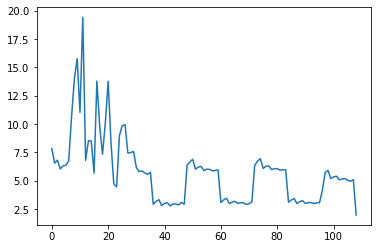

####
109/9216 fishished experiments
####
2020-10-02 07:49:00.151018
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.166, 0.125, 0.223, nan, 0.107]
nb_params: 9281
time per iteration: [0.207, 0.403, 0.601, 0, 0.874]
total time: 2.085
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user54_imp.pkl


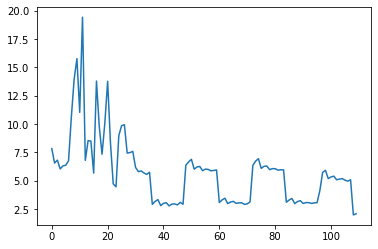

####
110/9216 fishished experiments
####
2020-10-02 07:51:11.840534
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.167, 0.11, 0.168, 0.143, 0.091]
nb_params: 9281
time per iteration: [0.212, 0.407, 0.608, 0.782, 0.96]
total time: 2.969
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user54_imp.pkl


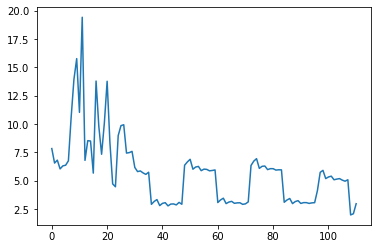

####
111/9216 fishished experiments
####
2020-10-02 07:54:17.145648
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.338, 0.123, 0.218, 0.0, 0.114]
nb_params: 4673
time per iteration: [0.192, 0.382, 0.543, 0.688, 0.823]
total time: 2.628
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user54_imp.pkl


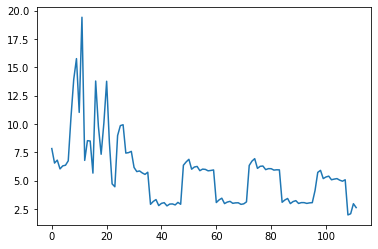

####
112/9216 fishished experiments
####
2020-10-02 07:56:58.928914
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.15, 0.11, 0.204, 0.08, 0.1]
nb_params: 4673
time per iteration: [0.188, 0.378, 0.551, 0.711, 0.867]
total time: 2.695
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user54_imp.pkl


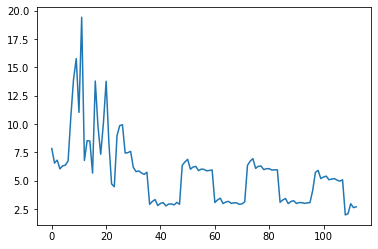

####
113/9216 fishished experiments
####
2020-10-02 07:59:44.884223
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.188, 0.108, 0.209, 0.444, 0.078]
nb_params: 4673
time per iteration: [0.2, 0.387, 0.563, 0.736, 0.876]
total time: 2.762
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user54_imp.pkl


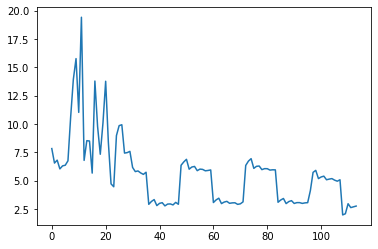

####
114/9216 fishished experiments
####
2020-10-02 08:02:35.021303
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.319, 0.114, 0.201, 0.209, 0.099]
nb_params: 2369
time per iteration: [0.186, 0.358, 0.54, 0.672, 0.813]
total time: 2.569
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user54_imp.pkl


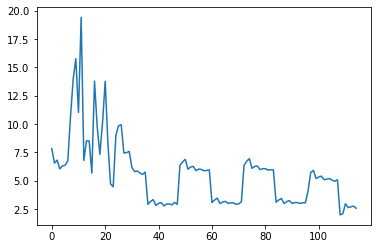

####
115/9216 fishished experiments
####
2020-10-02 08:05:11.600965
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.201, 0.113, 0.212, 0.349, 0.088]
nb_params: 2369
time per iteration: [0.196, 0.367, 0.536, 0.692, 0.843]
total time: 2.634
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user54_imp.pkl


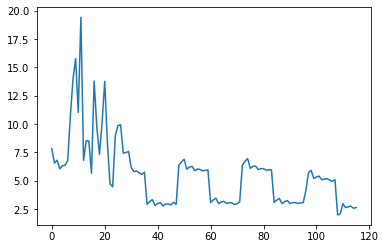

####
116/9216 fishished experiments
####
2020-10-02 08:07:52.345056
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.244, 0.105, 0.219, 0.273, 0.072]
nb_params: 2369
time per iteration: [0.196, 0.371, 0.549, 0.702, 0.853]
total time: 2.6710000000000003
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user54_imp.pkl


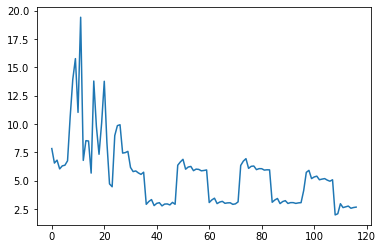

####
117/9216 fishished experiments
####
2020-10-02 08:10:35.314333
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.376, 0.114, 0.251, 0.393, 0.084]
nb_params: 1217
time per iteration: [0.186, 0.361, 0.528, 0.676, 0.796]
total time: 2.5469999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user54_imp.pkl


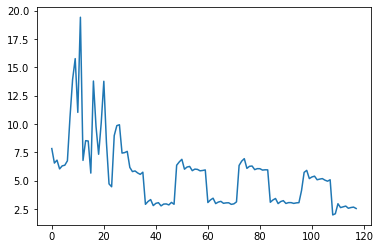

####
118/9216 fishished experiments
####
2020-10-02 08:13:09.981977
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.26, 0.114, 0.22, 0.275, 0.075]
nb_params: 1217
time per iteration: [0.188, 0.362, 0.537, 0.68, 0.759]
total time: 2.5260000000000002
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user54_imp.pkl


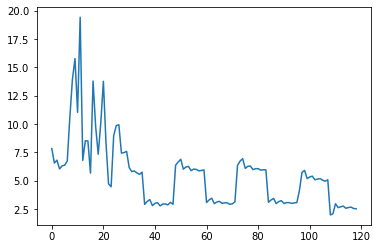

####
119/9216 fishished experiments
####
2020-10-02 08:15:43.207881
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user54_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.373, 0.108, 0.219, 0.249, 0.081]
nb_params: 1217
time per iteration: [0.193, 0.364, 0.537, 0.695, 0.827]
total time: 2.6159999999999997
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user54_imp.pkl


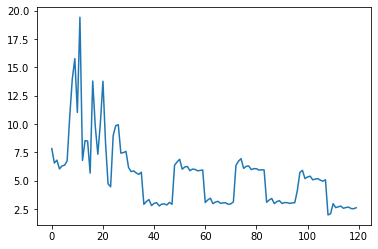

####
120/9216 fishished experiments
####
2020-10-02 08:18:22.128419
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.15, 0.15, 0.163, 0.133, 0.057]
nb_params: 9409
time per iteration: [0.456, 0.898, 1.341, 1.704, 1.986]
total time: 6.385
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user53_imp.pkl


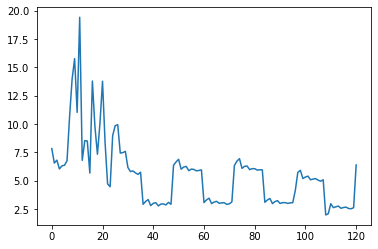

####
121/9216 fishished experiments
####
2020-10-02 08:24:58.666403
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.159, 0.147, 0.142, 0.104, 0.049]
nb_params: 9409
time per iteration: [0.475, 0.903, 1.385, 1.796, 2.127]
total time: 6.686
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user53_imp.pkl


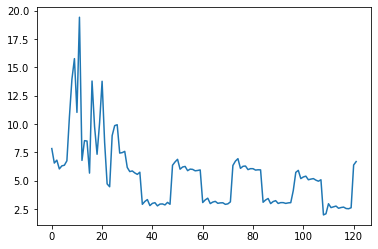

####
122/9216 fishished experiments
####
2020-10-02 08:31:53.703602
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.148, 0.109, 0.119, 0.075, 0.041]
nb_params: 9409
time per iteration: [0.473, 0.986, 1.447, 1.834, 2.245]
total time: 6.985
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user53_imp.pkl


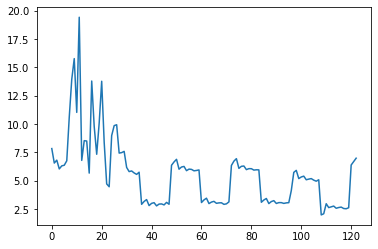

####
123/9216 fishished experiments
####
2020-10-02 08:39:07.303430
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.173, 0.149, 0.154, 0.115, 0.064]
nb_params: 4801
time per iteration: [0.425, 0.861, 1.264, 1.621, 1.966]
total time: 6.137
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user53_imp.pkl


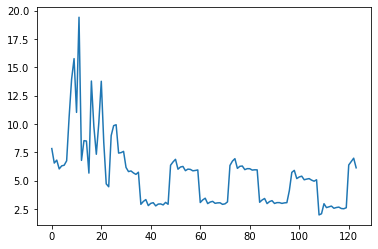

####
124/9216 fishished experiments
####
2020-10-02 08:45:22.940997
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.152, 0.134, 0.132, 0.107, 0.049]
nb_params: 4801
time per iteration: [0.434, 0.849, 1.296, 1.669, 2.188]
total time: 6.436
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user53_imp.pkl


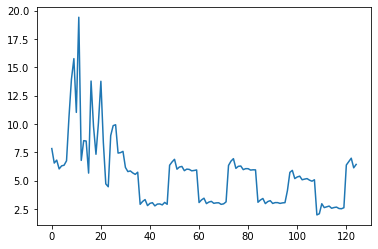

####
125/9216 fishished experiments
####
2020-10-02 08:51:56.805483
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.125, 0.11, 0.112, 0.075, 0.043]
nb_params: 4801
time per iteration: [0.448, 0.889, 1.295, 1.69, 2.021]
total time: 6.342999999999999
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user53_imp.pkl


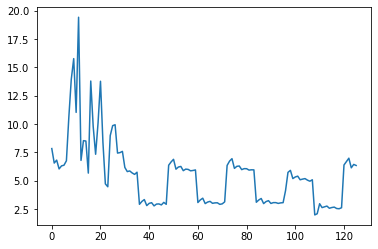

####
126/9216 fishished experiments
####
2020-10-02 08:58:25.572014
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.17, 0.147, 0.145, 0.116, 0.065]
nb_params: 2497
time per iteration: [0.42, 0.811, 1.231, 1.612, 1.913]
total time: 5.987
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user53_imp.pkl


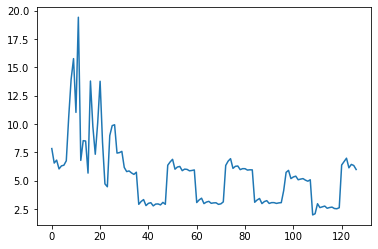

####
127/9216 fishished experiments
####
2020-10-02 09:04:29.304590
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.145, 0.143, 0.127, 0.098, 0.053]
nb_params: 2497
time per iteration: [0.421, 0.846, 1.253, 1.434, 1.944]
total time: 5.898
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user53_imp.pkl


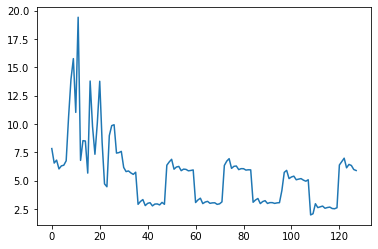

####
128/9216 fishished experiments
####
2020-10-02 09:10:27.594505
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.13, 0.115, 0.106, 0.074, 0.042]
nb_params: 2497
time per iteration: [0.427, 0.85, 1.285, 1.615, 1.976]
total time: 6.153
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user53_imp.pkl


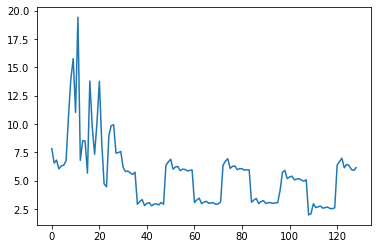

####
129/9216 fishished experiments
####
2020-10-02 09:16:41.100189
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.169, 0.153, 0.142, 0.112, 0.065]
nb_params: 1345
time per iteration: [0.407, 0.826, 1.224, 1.574, 1.901]
total time: 5.9319999999999995
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user53_imp.pkl


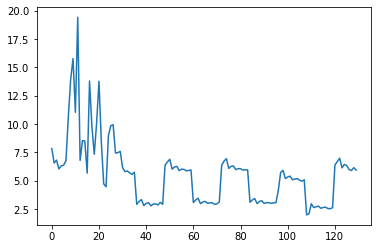

####
130/9216 fishished experiments
####
2020-10-02 09:22:39.621511
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.15, 0.135, 0.118, 0.098, 0.056]
nb_params: 1345
time per iteration: [0.42, 0.822, 1.236, 1.583, 1.922]
total time: 5.983
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user53_imp.pkl


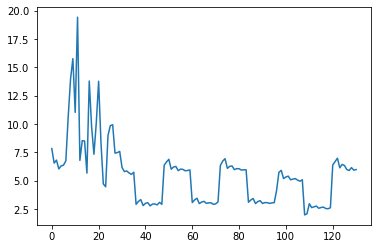

####
131/9216 fishished experiments
####
2020-10-02 09:28:41.312734
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.147, 0.115, 0.105, 0.076, 0.043]
nb_params: 1345
time per iteration: [0.417, 0.803, 1.224, 1.588, 1.898]
total time: 5.93
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags1_model-mlp_user53_imp.pkl


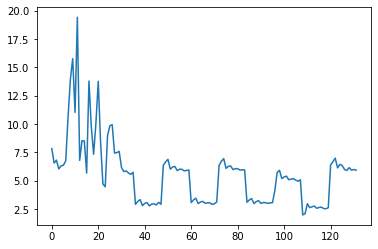

####
132/9216 fishished experiments
####
2020-10-02 09:34:39.826643
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.138, 0.103, 0.083, 0.12, 0.039]
nb_params: 9409
time per iteration: [0.22, 0.442, 0.637, 0.774, 0.991]
total time: 3.064
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags8_model-mlp_user53_imp.pkl


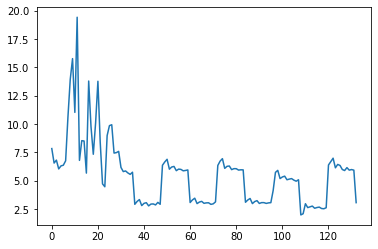

####
133/9216 fishished experiments
####
2020-10-02 09:37:50.373975
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.102, 0.106, 0.111, 0.099, 0.031]
nb_params: 9409
time per iteration: [0.237, 0.471, 0.692, 0.883, 1.06]
total time: 3.343
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags8_model-mlp_user53_imp.pkl


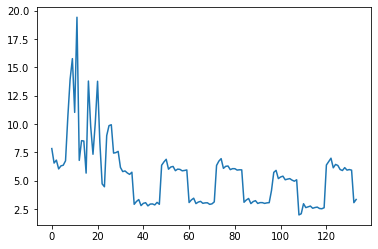

####
134/9216 fishished experiments
####
2020-10-02 09:41:18.109365
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags8_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.086, 0.079, 0.082, 0.072, 0.025]
nb_params: 9409
time per iteration: [0.247, 0.485, 0.726, 0.882, 1.062]
total time: 3.402
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags8_model-mlp_user53_imp.pkl


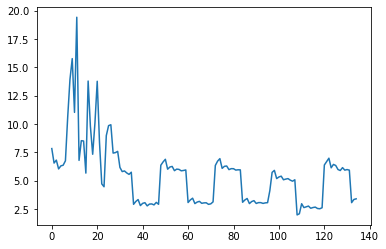

####
135/9216 fishished experiments
####
2020-10-02 09:44:49.431475
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.116, 0.095, 0.103, 0.1, 0.042]
nb_params: 4801
time per iteration: [0.216, 0.41, 0.607, 0.78, 0.927]
total time: 2.94
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags4_model-mlp_user53_imp.pkl


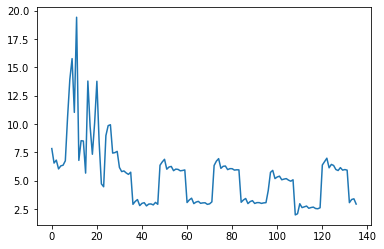

####
136/9216 fishished experiments
####
2020-10-02 09:47:49.624056
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.113, 0.103, 0.097, 0.09, 0.035]
nb_params: 4801
time per iteration: [0.219, 0.423, 0.622, 0.809, 0.969]
total time: 3.042
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags4_model-mlp_user53_imp.pkl


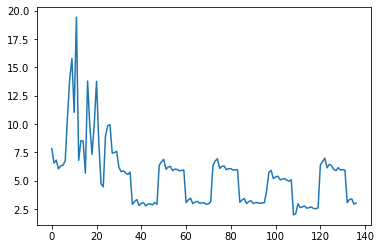

####
137/9216 fishished experiments
####
2020-10-02 09:50:56.047815
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags4_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.085, 0.078, 0.077, 0.067, 0.026]
nb_params: 4801
time per iteration: [0.207, 0.453, 0.668, 0.859, 1.031]
total time: 3.218
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags4_model-mlp_user53_imp.pkl


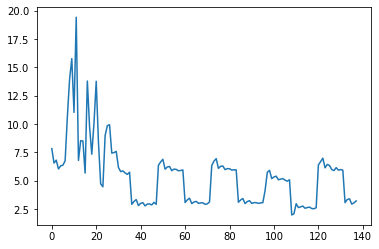

####
138/9216 fishished experiments
####
2020-10-02 09:54:13.482192
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.139, 0.104, 0.093, 0.093, 0.046]
nb_params: 2497
time per iteration: [0.218, 0.432, 0.629, 0.794, 0.955]
total time: 3.028
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags2_model-mlp_user53_imp.pkl


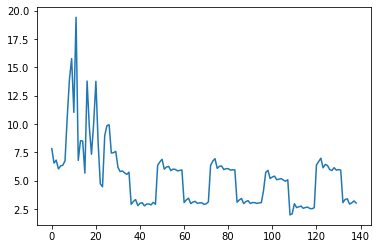

####
139/9216 fishished experiments
####
2020-10-02 09:57:18.042964
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.126, 0.106, 0.096, 0.086, 0.036]
nb_params: 2497
time per iteration: [0.225, 0.437, 0.582, 0.805, 0.97]
total time: 3.019
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags2_model-mlp_user53_imp.pkl


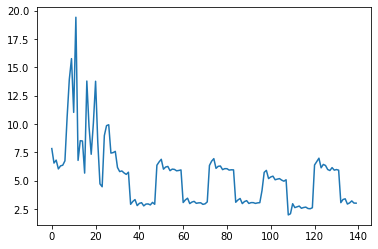

####
140/9216 fishished experiments
####
2020-10-02 10:00:21.995601
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags2_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.09, 0.089, 0.076, 0.063, 0.028]
nb_params: 2497
time per iteration: [0.232, 0.43, 0.637, 0.794, 0.961]
total time: 3.054
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags2_model-mlp_user53_imp.pkl


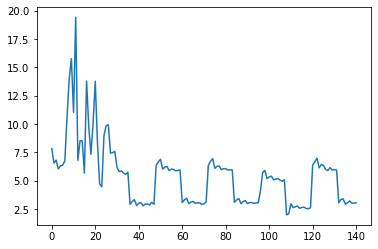

####
141/9216 fishished experiments
####
2020-10-02 10:03:27.882649
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period4_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.139, 0.108, 0.089, 0.089, 0.047]
nb_params: 1345
time per iteration: [0.21, 0.4, 0.617, 0.799, 0.946]
total time: 2.9719999999999995
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period4_lags1_model-mlp_user53_imp.pkl


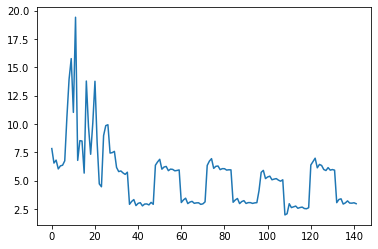

####
142/9216 fishished experiments
####
2020-10-02 10:06:28.000174
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period2_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.111, 0.106, 0.089, 0.084, 0.043]
nb_params: 1345
time per iteration: [0.22, 0.428, 0.638, 0.687, 0.977]
total time: 2.95
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period2_lags1_model-mlp_user53_imp.pkl


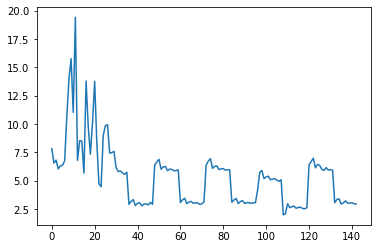

####
143/9216 fishished experiments
####
2020-10-02 10:09:26.790264
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran1h_period1_lags1_model-mlp_user53_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.101, 0.087, 0.067, 0.068, 0.028]
nb_params: 1345
time per iteration: [0.221, 0.429, 0.638, 0.803, 0.976]
total time: 3.067
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran1h_period1_lags1_model-mlp_user53_imp.pkl


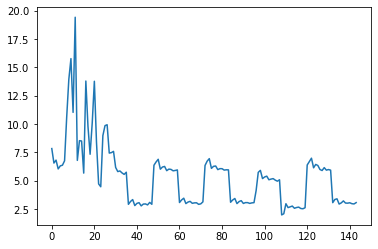

####
144/9216 fishished experiments
####
2020-10-02 10:12:32.621189
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags8_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.9, 0.83, 0.627, 1.309, 0.756]
nb_params: 9409
time per iteration: [0.47, 0.912, 1.331, 1.694, 1.896]
total time: 6.303
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags8_model-mlp_user51_imp.pkl


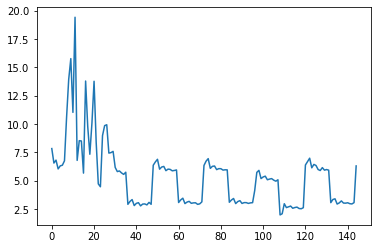

####
145/9216 fishished experiments
####
2020-10-02 10:19:04.477975
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags8_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.978, 0.789, 0.583, 1.187, 0.702]
nb_params: 9409
time per iteration: [0.472, 0.93, 1.374, 1.821, 2.126]
total time: 6.723000000000001
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags8_model-mlp_user51_imp.pkl


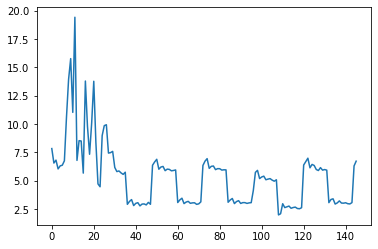

####
146/9216 fishished experiments
####
2020-10-02 10:26:01.842867
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags8_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.904, 0.751, 0.493, 0.946, 0.597]
nb_params: 9409
time per iteration: [0.489, 0.965, 1.44, 1.849, 2.225]
total time: 6.968
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags8_model-mlp_user51_imp.pkl


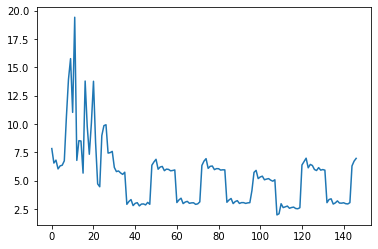

####
147/9216 fishished experiments
####
2020-10-02 10:33:14.580469
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags4_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.937, 0.801, 0.638, 1.291, 0.746]
nb_params: 4801
time per iteration: [0.422, 0.865, 1.231, 1.55, 1.971]
total time: 6.039
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags4_model-mlp_user51_imp.pkl


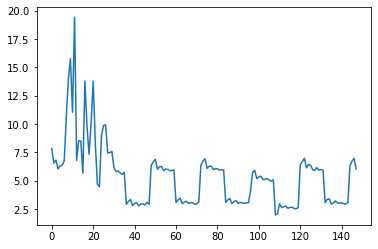

####
148/9216 fishished experiments
####
2020-10-02 10:39:24.455014
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags4_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.945, 0.796, 0.583, 1.191, 0.685]
nb_params: 4801
time per iteration: [0.434, 0.867, 1.272, 1.605, 1.921]
total time: 6.099
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags4_model-mlp_user51_imp.pkl


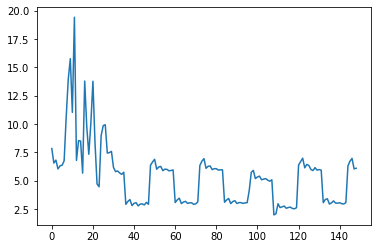

####
149/9216 fishished experiments
####
2020-10-02 10:45:38.033975
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags4_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.889, 0.736, 0.477, 0.934, 0.6]
nb_params: 4801
time per iteration: [0.424, 0.858, 1.284, 1.681, 2.019]
total time: 6.266
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags4_model-mlp_user51_imp.pkl


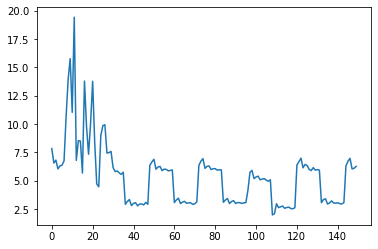

####
150/9216 fishished experiments
####
2020-10-02 10:52:01.847167
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags2_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.929, 0.797, 0.631, 1.276, 0.738]
nb_params: 2497
time per iteration: [0.426, 0.846, 1.236, 1.595, 1.937]
total time: 6.04
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags2_model-mlp_user51_imp.pkl


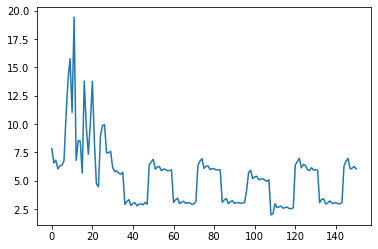

####
151/9216 fishished experiments
####
2020-10-02 10:58:08.511828
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags2_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.958, 0.798, 0.573, 1.19, 0.685]
nb_params: 2497
time per iteration: [0.431, 0.849, 1.256, 1.601, 1.959]
total time: 6.096
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags2_model-mlp_user51_imp.pkl


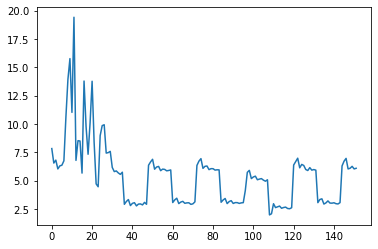

####
152/9216 fishished experiments
####
2020-10-02 11:04:18.836349
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags2_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.852, 0.735, 0.468, 0.943, 0.588]
nb_params: 2497
time per iteration: [0.424, 0.85, 1.245, 1.614, 1.963]
total time: 6.096
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period1_lags2_model-mlp_user51_imp.pkl


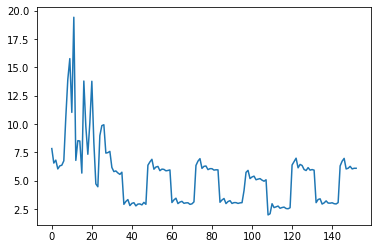

####
153/9216 fishished experiments
####
2020-10-02 11:10:28.948884
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period4_lags1_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.92, 0.801, 0.62, 1.295, 0.722]
nb_params: 1345
time per iteration: [0.413, 0.818, 1.24, 1.528, 1.854]
total time: 5.853
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period4_lags1_model-mlp_user51_imp.pkl


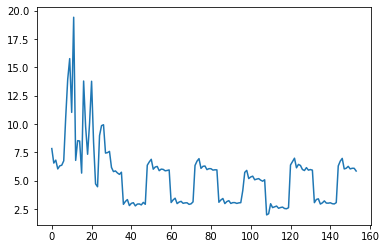

####
154/9216 fishished experiments
####
2020-10-02 11:16:22.877009
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period2_lags1_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5
scores: [0.95, 0.806, 0.576, 1.216, 0.681]
nb_params: 1345
time per iteration: [0.368, 0.798, 1.214, 1.535, 1.914]
total time: 5.829
Experiment finished
*** *** *** *** *** *** *** *** *** *** 

Saved experiment in pkl/experiments/_regression_gran30min_period2_lags1_model-mlp_user51_imp.pkl


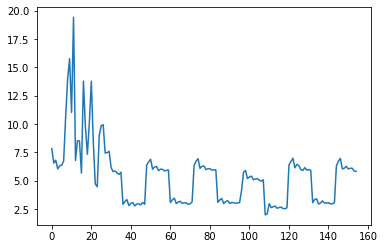

####
155/9216 fishished experiments
####
2020-10-02 11:22:15.316016
*** *** *** *** *** *** *** *** *** *** 
Experiment is: 
_regression_gran30min_period1_lags1_model-mlp_user51_imp
Beginning experiment: 
Starting iteration nb 1 of 5
Starting iteration nb 2 of 5
Starting iteration nb 3 of 5
Starting iteration nb 4 of 5
Starting iteration nb 5 of 5


In [ ]:
import os
import pickle as pkl
from experiments.experiment_running import run_all_experiments
def fitness():
    pass
run_all_experiments(reverse_order=True, verbose=1)